In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('CapstoneDataSet.csv')

In [ ]:
data.dtypes

Cust_Id       int64
Rating        int64
Movie_Id      int64
Genre        object
MovieName    object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101088 entries, 0 to 101087
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Cust_Id    101088 non-null  int64 
 1   Rating     101088 non-null  int64 
 2   Movie_Id   101088 non-null  int64 
 3   Genre      101088 non-null  object
 4   MovieName  101088 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


In [ ]:
data.columns

Index(['Cust_Id', 'Rating', 'Movie_Id', 'Genre', 'MovieName'], dtype='object')

In [ ]:
data.head(5)

Cust_Id  Rating  Movie_Id   Genre        MovieName
0  1488844       3         1  Action  Dinosaur Planet
1   822109       5         1  Action  Dinosaur Planet
2   885013       4         1  Action  Dinosaur Planet
3    30878       4         1  Action  Dinosaur Planet
4   823519       3         1  Action  Dinosaur Planet

In [ ]:
data.shape

(101088, 5)

In [ ]:
data.describe()

Cust_Id         Rating       Movie_Id
count  1.010880e+05  101088.000000  101088.000000
mean   1.325496e+06       3.534564      21.273554
std    7.636364e+05       1.117709       8.480932
min    7.000000e+00       1.000000       1.000000
25%    6.637575e+05       3.000000      17.000000
50%    1.323812e+06       4.000000      26.000000
75%    1.985908e+06       4.000000      28.000000
max    2.649426e+06       5.000000      30.000000

In [ ]:
data.isnull().sum() # missing / null values

Cust_Id      0
Rating       0
Movie_Id     0
Genre        0
MovieName    0
dtype: int64

In [ ]:
import seaborn as sns

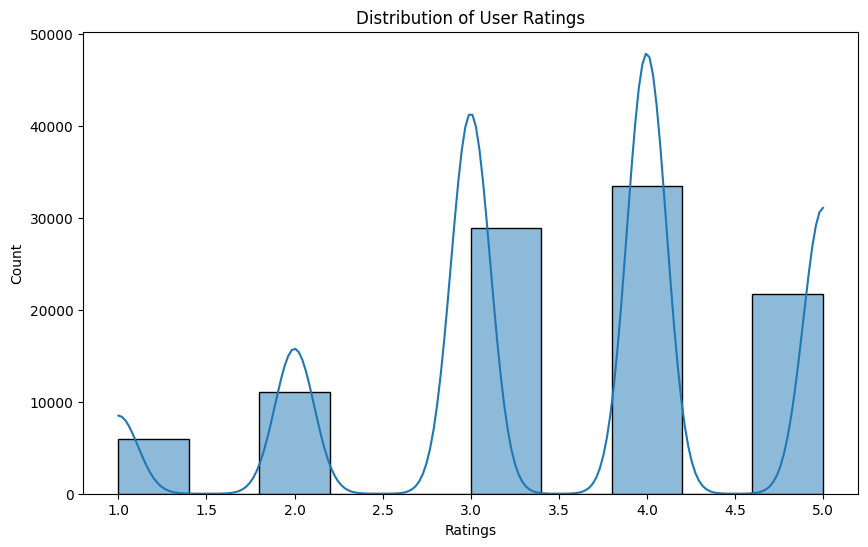

In [ ]:
# distribution of user ratings
plt.figure(figsize=(10,6))
sns.histplot(data['Rating'], bins =10, kde = True)
plt.title("Distribution of User Ratings")
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

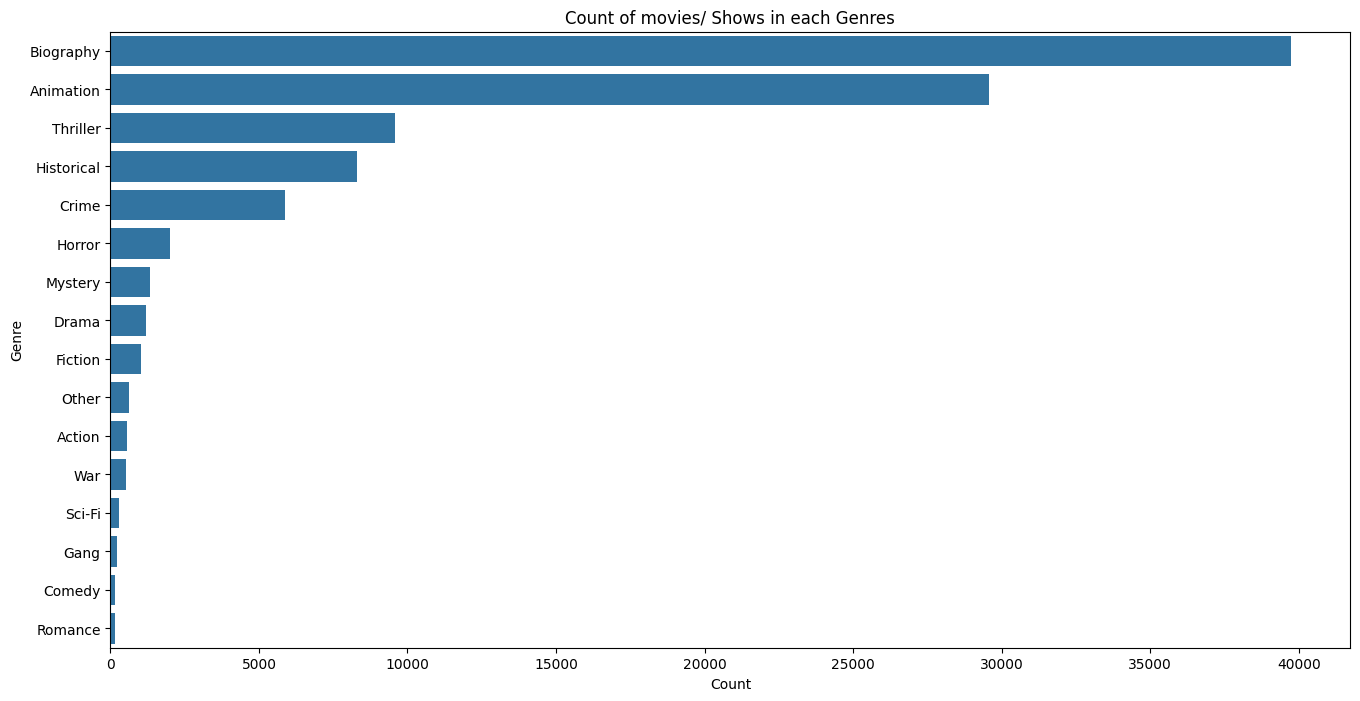

In [ ]:
# Countplot of Genres

plt.figure(figsize=(16,8))
sns.countplot(y = 'Genre', data = data, order= data['Genre'].value_counts().index)
plt.title("Count of movies/ Shows in each Genres")
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

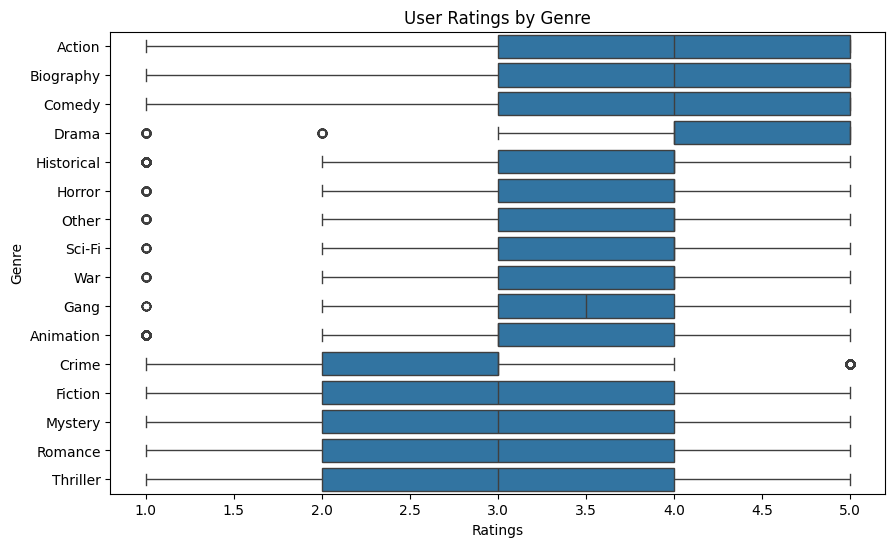

In [ ]:
# Boxplot of ratings by genre
plt.figure(figsize=(10,6))
sns.boxplot(x= 'Rating',y='Genre', data=data, order= data.groupby('Genre')['Rating'].median().sort_values(ascending = False).index)
plt.title("User Ratings by Genre")
plt.xlabel('Ratings')
plt.ylabel('Genre')
plt.show()

<ipython-input-64-e15197d65a3c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


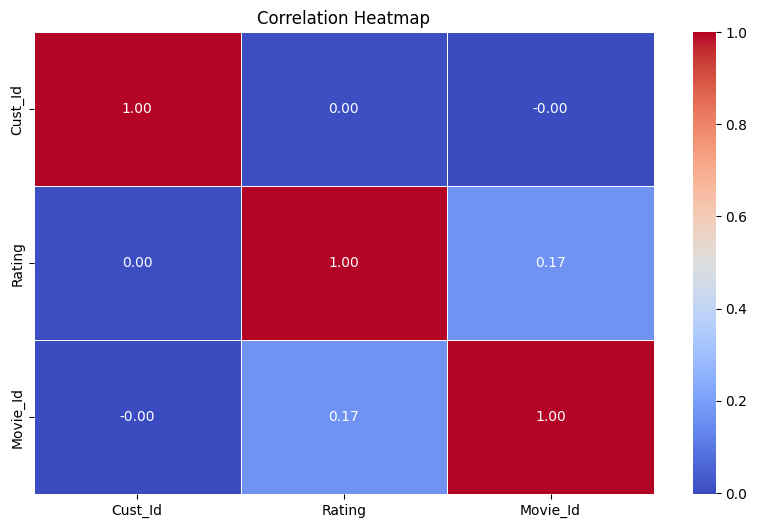

In [ ]:
# correlation heatmap

plt.figure(figsize=(10,6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt ='.2f', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
genre_stats= data.groupby('Genre')['Rating'].agg(['mean', 'count'])
genre_stats

mean  count
Genre                      
Action      3.749543    547
Animation   3.393938  29563
Biography   3.823254  39752
Comedy      3.558621    145
Crime       2.793721   5861
Drama       3.970174   1207
Fiction     3.084396   1019
Gang        3.463303    218
Historical  3.757660   8290
Horror      3.641153   2012
Mystery     2.993998   1333
Other       3.556098    615
Romance     2.739437    142
Sci-Fi      3.527473    273
Thriller    3.073112   9588
War         3.598470    523

In [ ]:
# Most liked and popular genres

most_liked_genre = genre_stats.idxmax()['mean']
most_liked_genre

'Drama'

In [ ]:
most_popular_genre = genre_stats.idxmax()['count']
most_popular_genre

'Biography'

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD

In [87]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [88]:
train_matrix = train_data.pivot(index='Cust_Id', columns='Movie_Id', values='Rating').fillna(0)
test_matrix = test_data.pivot(index='Cust_Id', columns='Movie_Id', values='Rating').fillna(0)


In [89]:
n_components = 10  # Number of latent factors
# Applying svd
svd = TruncatedSVD(n_components=n_components)
latent_matrix = svd.fit_transform(train_matrix)

In [90]:
predicted_test = svd.inverse_transform(latent_matrix)
pred_test_df = pd.DataFrame(predicted_test, columns=train_matrix.columns, index=train_matrix.index)

In [91]:
# Evaluate the model's accuracy
common_users = test_matrix.index.intersection(pred_test_df.index)
common_movies = test_matrix.columns.intersection(pred_test_df.columns)


In [92]:
# Filter the matrices to include only common users and movies
test_matrix_common = test_matrix.loc[common_users, common_movies]
pred_test_df_common = pred_test_df.loc[common_users, common_movies]

In [93]:
# Calculate Mean Squared Error
mse = mean_squared_error(test_matrix_common, pred_test_df_common)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9759499770693736
